# Stock market analysis using data from the Yahoo-Finance Web API

## Libraries and settings

In [13]:
# Libraries
import os
import ta
import fnmatch
import pandas as pd
import yfinance as yf           # Yahoo Finance API-Wrapper 
from datetime import datetime
import matplotlib.pyplot as plt

# Define settings for graphics
# plt.style.use('dark_background')

# Settings
import warnings
warnings.filterwarnings("ignore")

# Current working directory
print(os.getcwd())

/workspaces/Clone_data_ingestion/05_Yahoo_Finance_WebAPI (ohne backtesting)


#### **Zusammenfassung der Librarie: Yfinance**. 
##### Yfinance ist ein inoffizieller Python‑Wrapper, der Yahoo Finance‑Daten in Pandas-DataFrames zurückliefert


##### **yf.download** = schneller Mehrfach-Abruf historischer Kursdaten
##### Wichtige Prameter:
- **tickers** (z. B. 'MSFT' oder ['MSFT','AAPL'])
- **start, end** (YYYY-MM-DD) oder period ('1y','6mo'...)
- **interval** ('1d','1h','5m' — Achtung: Intraday nur für kürzere Perioden)
- **group_by** ('ticker' oder default)
- **auto_adjust** (True/False) — berechnet automatische Adjusted Close
- **threads** (True/False) — paralleles Herunterladen
##### Rückgabe: DataFrame mit Spalten Open, High, Low, Close, Adj Close, Volume (bei mehreren Ticker MultiIndex möglich).

##### **yf.Ticker** = objektorientierter Zugriff auf ein einzelnes Wertpapier inklusive fundamentaler Zusatzinformationen plus Preisverlauf.
- ticker = yf.Ticker('MSFT')
- ticker.history(period='1y', interval='1d') — wie yf.download, aber per Ticker
- ticker.info — dict mit Metadaten (Company name, sector, marketCap ...)
- ticker.fast_info — kompakteres Info-Objekt (je nach yfinance-Version)
- ticker.actions — DataFrame mit Dividenden & Splits
- ticker.dividends — Series
- ticker.splits — Series
- ticker.earnings, ticker.quarterly_earnings — DataFrames
- ticker.financials, ticker.balance_sheet, ticker.cashflow — DataFrames (jährlich)
- ticker.get_recommendations() — Analysten‑Empfehlungen (wenn verfügbar)
- ticker.options — list von Expiration-Dates; ticker.option_chain(date) — Optionen-DataFrame



## Get data
List of stock market symbols: https://finance.yahoo.com/lookup

In [14]:
# Retrieve the Microsoft stock data from Yahoo finance / normal Ticker download
today = datetime.now().strftime("%Y-%m-%d")
print('Today is:', today)

data = yf.download('MSFT', start = "2022-01-01", end = today, progress=False)
data.tail()
# data.info()

Today is: 2025-11-09


Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,
2025-11-03,517.030029,524.960022,514.590027,519.809998,22374700
2025-11-04,514.330017,515.549988,507.839996,511.760010,20958700
2025-11-05,507.160004,514.830017,506.579987,513.299988,23024300
2025-11-06,497.100006,505.700012,495.809998,505.660004,27406500
2025-11-07,496.820007,499.380005,493.250000,496.950012,23980600


In [15]:
# Option um mehrere Ticker gleichzeitig herunterzuladen:
temp = yf.download(['AAPL','MSFT'], start='2023-01-01', group_by='ticker')
# temp.head()

# Abfragen der Daten:
temp['AAPL']['Close'] # Zugriff auf Apple Close Preise

[*********************100%***********************]  2 of 2 completed


Date
2023-01-03    123.330650
2023-01-04    124.602715
2023-01-05    123.281342
2023-01-06    127.817368
2023-01-09    128.339996
                 ...    
2025-11-03    269.049988
2025-11-04    270.040009
2025-11-05    270.140015
2025-11-06    269.769989
2025-11-07    268.470001
Name: Close, Length: 716, dtype: float64

In [16]:
# Erweiterte Ticker-Funktionalität
# Mit der Ticker-Klasse können weitere Informationen und Daten abgerufen werden
# wie Dividenden, Gewinnberichte, Optionsdaten usw.

# Beispiel für Microsoft:
t = yf.Ticker('MSFT')

# 1. Historische Daten der letzten 6 Monate
print("\n=== Historische Daten (letzte 5 Tage) ===")
hist = t.history(period='6mo', interval='1d')
print(hist.tail())

# 2. Basis-Informationen zum Unternehmen
print("\n=== Basis-Informationen ===")
info = t.info
print(f"Name: {info.get('longName', 'N/A')}")
print(f"Sektor: {info.get('sector', 'N/A')}")
print(f"Industrie: {info.get('industry', 'N/A')}")
print(f"Land: {info.get('country', 'N/A')}")
print(f"Website: {info.get('website', 'N/A')}")

# 3. Dividenden (letzte 5)
print("\n=== Letzte Dividenden ===")
divs = t.dividends
print(divs.tail())

# 4. Gewinnzahlen (jährlich)
print("\n=== Gewinnzahlen (jährlich) ===")
earnings = t.earnings
print(earnings)

# 5. Options-Daten (wenn verfügbar)
print("\n=== Options-Daten ===")
options_dates = t.options
print("Verfügbare Options-Termine:", options_dates[:5] if options_dates else "Keine")

if options_dates:
    print("\nErste Options-Kette:")
    opt = t.option_chain(options_dates[0])
    print("\nCall Options (erste 3):")
    print(opt.calls[['strike', 'lastPrice', 'volume', 'impliedVolatility']].head(3))
    print("\nPut Options (erste 3):")
    print(opt.puts[['strike', 'lastPrice', 'volume', 'impliedVolatility']].head(3))


=== Historische Daten (letzte 5 Tage) ===
                                 Open        High         Low       Close  \
Date                                                                        
2025-11-03 00:00:00-05:00  519.809998  524.960022  514.590027  517.030029   
2025-11-04 00:00:00-05:00  511.760010  515.549988  507.839996  514.330017   
2025-11-05 00:00:00-05:00  513.299988  514.830017  506.579987  507.160004   
2025-11-06 00:00:00-05:00  505.660004  505.700012  495.809998  497.100006   
2025-11-07 00:00:00-05:00  496.950012  499.380005  493.250000  496.820007   

                             Volume  Dividends  Stock Splits  
Date                                                          
2025-11-03 00:00:00-05:00  22374700        0.0           0.0  
2025-11-04 00:00:00-05:00  20958700        0.0           0.0  
2025-11-05 00:00:00-05:00  23024300        0.0           0.0  
2025-11-06 00:00:00-05:00  27406500        0.0           0.0  
2025-11-07 00:00:00-05:00  23980600    

## Calculate techniqual indicators

In [21]:
# Function to compute Bollinger Bands 
def BBANDS(data, n):                            # Definiert eine Funktion, die Bollinger-Bänder für ein DataFrame berechnet, n = Fenstergrösse
    MA = data.Close.rolling(window=n).mean()    # Berechnet den gleitenden Durchschnitt (Moving Average) der 'Close'-Spalte über n Tage
    SD = data.Close.rolling(window=n).std()     # Berechnet die Standardabweichung der 'Close'-Spalte über n Tage
    data['MiddleBand'] = MA                     # Fügt den gleitenden Durchschnitt als 'MiddleBand' zum DataFrame hinzu
    data['UpperBand'] = MA + (2 * SD)           # Berechnet das obere Band (2 Standardabweichungen über dem Mittelwert)
    data['LowerBand'] = MA - (2 * SD)           # Berechnet das untere Band (2 Standardabweichungen unter dem Mittelwert)
    return data                                 # Gibt das DataFrame mit den neuen Spalten zurück
 
# Compute the Bollinger Bands for Google using the 50-day Moving average
BBANDS = BBANDS(data, 50)                       # Wendet die Funktion auf den Datensatz 'data' an mit einem 50-Tage-Fenster
BBANDS                                          # Zeigt das DataFrame mit den berechneten Bollinger-Bändern an


Ticker,MSFT
Date,
2022-01-03,NaN
2022-01-04,NaN
2022-01-05,NaN
2022-01-06,NaN
2022-01-07,NaN
...,...
2025-11-03,521.166496
2025-11-04,520.683998
2025-11-05,519.799500


## Plot data and techniqual indicators

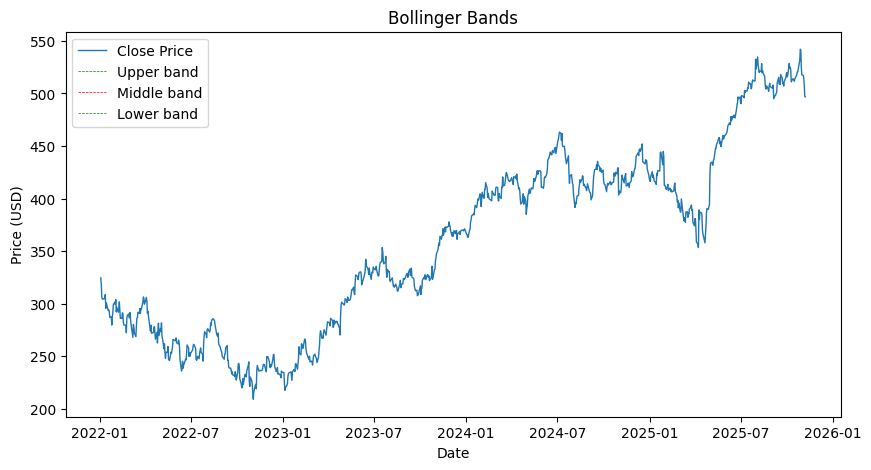

In [22]:
# Create the plot
plt.figure(figsize=(10, 5))            # Erstellt eine neue Figure mit einer Grösse von 10x5 Zoll

# Set the title and axis labels
plt.title('Bollinger Bands')           # Setzt den Titel des Diagramms
plt.xlabel('Date')                     # Beschriftet die X-Achse mit "Date"
plt.ylabel('Price (USD)')              # Beschriftet die Y-Achse mit "Price (USD)"

plt.plot(BBANDS.Close, lw=1.0, label='Close Price')              # Zeichnet den Schlusskurs als Linie mit Label "Close Price"
plt.plot(data['UpperBand'], 'g--', lw=0.5, label='Upper band')   # Zeichnet das obere Band als grüne gestrichelte Linie
plt.plot(data['MiddleBand'], 'r--', lw=0.5, label='Middle band') # Zeichnet das mittlere Band als rote gestrichelte Linie
plt.plot(data['LowerBand'], 'g--', lw=0.5, label='Lower band')   # Zeichnet das untere Band als grüne gestrichelte Linie

# Add a legend to the axis
plt.legend() # Fügt dem Diagramm eine Legende hinzu

plt.show()   # Zeigt das Diagramm an

### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [24]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.10.14-linuxkit
Datetime: 2025-11-09 09:29:52
Python Version: 3.11.14
-----------------------------------
